In [256]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn import linear_model

In [257]:
NYcrimeDf = pd.read_csv('NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013 - 13tbl8ny.csv', skiprows=4).fillna(0)
NYcrimeDf.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,"1,861",0,0.0,0.0,0,0,0,12,2,10,0,0.0
1,Addison Town and Village,"2,577",3,0.0,0.0,0,0,3,24,3,20,1,0.0
2,Akron Village,"2,846",3,0.0,0.0,0,0,3,16,1,15,0,0.0
3,Albany,"97,956",791,8.0,0.0,30,227,526,"4,090",705,"3,243",142,0.0
4,Albion Village,"6,388",23,0.0,0.0,3,4,16,223,53,165,5,0.0


In [258]:
#Propertycrime = α + Population + Population2 + Murder + Robbery
murder = 0

population = []
for x in NYcrimeDf['Population']:
    pop = str(x).replace(',','')
    population.append(int(pop))
    
Population = pd.DataFrame(population)
multivarReg = pd.DataFrame()
multivarReg['Population'] = Population[0]**(1/8)
multivarReg['Population^2'] = multivarReg['Population']**2


Murder_Cate = []
for key in NYcrimeDf['Murder and\nnonnegligent\nmanslaughter']:
    if key > 0:
        Murder_Cate.append(1)
    else:
        Murder_Cate.append(0)

multivarReg['Murder'] = Murder_Cate

robbery = []
for key in NYcrimeDf['Robbery']:
    rob = int(str(key).replace(',',''))
    
    if rob > 0:
        robbery.append(1)
    else:
        robbery.append(0)
multivarReg['Robbery'] = robbery

PropertyCrime = []
for x in NYcrimeDf['Property\ncrime']:
    propCrime = str(x).replace(',','')
    PropertyCrime.append(int(propCrime))

PropertyCrime = pd.DataFrame(PropertyCrime)
multivarReg['Property crime'] = np.log(PropertyCrime[0])

multivarReg.head()

C:\Users\ktser\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log


,Population,Population^2,Murder,Robbery,Property crime
0,2.562821,6.568052,0,0,2.484907
1,2.669250,7.124897,0,0,3.178054
2,2.702585,7.303966,0,0,2.772589
3,4.206093,17.691219,1,1,8.316300
4,2.989996,8.940076,0,1,5.407172


In [259]:
#These are the outliers, we need to remove
i = multivarReg[multivarReg['Property crime'] <= 0].index.tolist()
i = i +[216, 346]

multivarReg = multivarReg.drop(i)


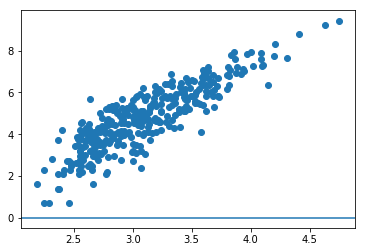

In [260]:

plt.scatter(multivarReg['Population'],multivarReg['Property crime'])
plt.axhline(y=0)
plt.show()

In [261]:
#the linear model
regr = linear_model.LinearRegression()

#Property crime, the outcome
Y = multivarReg['Property crime'].values.reshape(-1, 1)

#The independen variables, features
X = multivarReg[['Population','Murder', 'Robbery']]

regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))



Coefficients: 
 [[ 2.28378037  0.23499398  0.85698579]]

Intercept: 
 [-2.84319579]

R-squared:
0.810192051293


In [262]:
# multivariable normality
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = multivarReg['Property crime']

# Calculate the error, also called the residual.
residual = actual - predicted


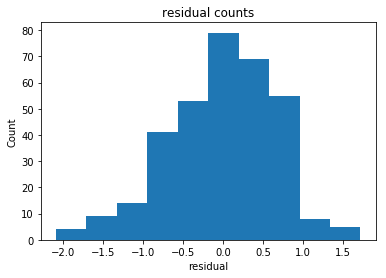

In [264]:
plt.hist(residual)
plt.title('residual counts')
plt.xlabel('residual')
plt.ylabel('Count')
plt.show()

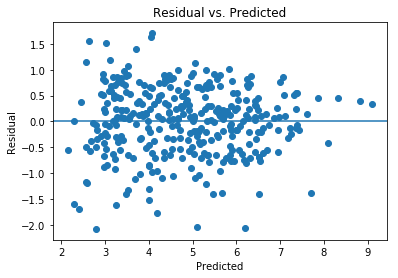

In [263]:
#Homoscedasticity
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()


<p>For the above analysis, I used the Population, Murder, and Robbery as the variables.</p>

<p>The initial analysis had high R^2, indicating high corrolation between input and output variables but the error did not have normal distribution and the error for outcome valuse varried greatly. This tell us that there are overfitting and the model is claming much higher accuracy than actualy is.</p>

<p>The model assumes a linear relation between outcome and input variables and that is not true. Since Murder and Robbery were categorical variables, there was nothing much to be done to create linear relations with the outcome. For the population variable I took 1/8 power of variable and natural log of the outcome (Property crime) to create linear relation and removing some outliers.For this reason, it was not practical to include population squred feature in the model, it has opposit effect of an linear relation.</p>

<p>After the transformation of the variables, the error distribution is normal, linear relation amongs the variables and the outcome, and the error variance is much lower and uniforme than initial analysis.</p>